## Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

In [1]:
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

/home/jovyan/.local/share/envs/sotu/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import spacy 

spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.6 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

## Analysis of Presidential Speeches using the LDA topic model

In [4]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [5]:
nlp = spacy.load("en_core_web_sm")

Here Im preprocessing the speeches, essentially getting rid of noisy words

In [6]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [7]:
processed_docs = sou['Text'].apply(preprocess_text)

In [8]:
dictionary = Dictionary(processed_docs) 
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filter rare/common words 
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [9]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=18, random_state=42, passes=10)

##### Top 10 words for each topic

In [10]:
print("\n--- Real News LDA Topics ---") 
for idx, topic in lda_model.print_topics(-1): 
    print(f"Topic: {idx} \nWords: {topic}\n")


--- Real News LDA Topics ---
Topic: 0 
Words: 0.004*"cent" + 0.004*"june" + 0.004*"gold" + 0.003*"island" + 0.003*"silver" + 0.003*"bond" + 0.003*"method" + 0.003*"convention" + 0.003*"indian" + 0.003*"note"

Topic: 1 
Words: 0.008*"depression" + 0.007*"program" + 0.007*"recovery" + 0.006*"budget" + 0.006*"unemployment" + 0.006*"loan" + 0.006*"activity" + 0.006*"farm" + 0.005*"emergency" + 0.005*"cent"

Topic: 2 
Words: 0.008*"dictator" + 0.005*"expression" + 0.004*"british" + 0.004*"1914" + 0.003*"impressive" + 0.003*"actual" + 0.003*"revolution" + 0.003*"schedule" + 0.003*"continent" + 0.003*"partisanship"

Topic: 3 
Words: 0.008*"forest" + 0.007*"corporation" + 0.005*"judge" + 0.005*"wrong" + 0.005*"interstate" + 0.004*"employee" + 0.003*"bureau" + 0.003*"body" + 0.003*"mountain" + 0.003*"island"

Topic: 4 
Words: 0.017*"program" + 0.014*"soviet" + 0.009*"1980" + 0.009*"u.s." + 0.008*"area" + 0.007*"major" + 0.006*"goal" + 0.006*"commitment" + 0.006*"challenge" + 0.006*"nuclear"

T

Lets now look at the topic distribution for the very first speech:

In [11]:
topic_dist  = lda_model.get_document_topics(corpus[0]) ## topic dist
print(topic_dist)

[(11, np.float32(0.99942815))]


##### This tells us that essentially all of the speech of focused on topic 11 (assigned a weight of 0.999942815). It appears to be emphasising 9/11.

## Distribution of Topics Across Presidential Speeches, and the words associated with them

In [12]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124490 -0.021460       1        1  25.619796
6     -0.177721  0.042077       2        1  19.981033
5      0.215260  0.071386       3        1   9.901162
7      0.135347 -0.070053       4        1   9.756259
8     -0.048065 -0.119211       5        1   7.285937
17    -0.174387  0.056450       6        1   5.735792
13    -0.173280  0.057692       7        1   5.117080
9     -0.065566 -0.065617       8        1   3.673824
11     0.221114  0.096518       9        1   3.313084
12     0.108985 -0.107040      10        1   3.208181
4      0.170987 -0.059934      11        1   2.417549
3     -0.048335 -0.061174      12        1   1.964508
1      0.001805 -0.137938      13        1   1.024306
14     0.149811  0.117592      14        1   0.773046
15    -0.097709  0.071397      15        1   0.174831
2     -0.030759  0.033480      16        1   0.045779
10    -0.027617  0.048256      17        1   0.003916
16    -0.035383  0.047579      18        1   0.003916, topic_info=           Term         Freq        Total Category  logprob  loglift
509     program  1272.000000  1272.000000  Default  30.0000  30.0000
978      mexico   852.000000   852.000000  Default  29.0000  29.0000
31    americans   990.000000   990.000000  Default  28.0000  28.0000
5330    article   492.000000   492.000000  Default  27.0000  27.0000
666     tonight   667.000000   667.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3221     method     0.007818   526.093971  Topic18  -7.4658  -0.9690
664       today     0.007947   576.861497  Topic18  -7.4494  -1.0447
1148    appoint     0.007382   419.003878  Topic18  -7.5231  -0.7987
31    americans     0.008294   990.579258  Topic18  -7.4067  -1.5427
2624       cent     0.007440   614.048075  Topic18  -7.5154  -1.1731

[1282 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4847      4  0.881688  --the
4847      8  0.080153  --the
3170      1  0.132787   11th
3170      2  0.079672   11th
3170      6  0.292131   11th
...     ...       ...    ...
744       9  0.116606  young
744      10  0.003239  young
744      11  0.016195  young
744      12  0.009717  young
744      14  0.009717  young

[5615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 6, 8, 9, 18, 14, 10, 12, 13, 5, 4, 2, 15, 16, 3, 11, 17])

## Analysis of Presidential Speeches using the BERTopic model

In [13]:
docs = sou['Text'].to_list()

Here, Im initializing the BERTopic model and fitting it to the dataframe of presidential speeches. Im also removing any stop words from the model output.

In [14]:
vectorizer = CountVectorizer(stop_words = 'english')
BERT_topic_model = BERTopic(min_topic_size = 3)
topics, weights = BERT_topic_model.fit_transform(docs)
BERT_topic_model.update_topics(docs, vectorizer_model = vectorizer)



##### Top 10 words for Each Topic

In [15]:
topic_info = BERT_topic_model.get_topic_info()

topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,55,-1_government_states_united_congress,"[government, states, united, congress, year, n...",[\nTo the Congress of the United States:\nYour...
1,0,22,0_world_people_new_america,"[world, people, new, america, american, years,...","[\nMr. Speaker, Mr. President, distinguished M..."
2,1,18,1_america_americans_american_tonight,"[america, americans, american, tonight, people...","[\nMr. Speaker, Mr. Vice President, Members of..."
3,2,14,2_government_states_united_law,"[government, states, united, law, year, congre...",[\nTo the Senate and House of Representatives:...
4,3,13,3_government_great_law_public,"[government, great, law, public, congress, wor...",[\nTo the Senate and House of Representatives:...
5,4,12,4_government_united_states_department,"[government, united, states, department, congr...",[\nFellow-Citizens of the Senate and House of ...
6,5,11,5_world_peace_nations_soviet,"[world, peace, nations, soviet, nation, war, e...","[\nMr. President, Mr. Speaker, Members of the ..."
7,6,11,6_states_government_united_year,"[states, government, united, year, congress, g...",[\nTo the Congress of the United States:\nAs y...
8,7,11,7_states_government_united_public,"[states, government, united, public, mexico, c...",[\nFellow-Citizens of the Senate and House of ...
9,8,9,8_new_people_america_help,"[new, people, america, help, americans, jobs, ...","[\nMadam Speaker, Mr. Vice President, Members ..."


##### Distrubution of topics across the very first speech

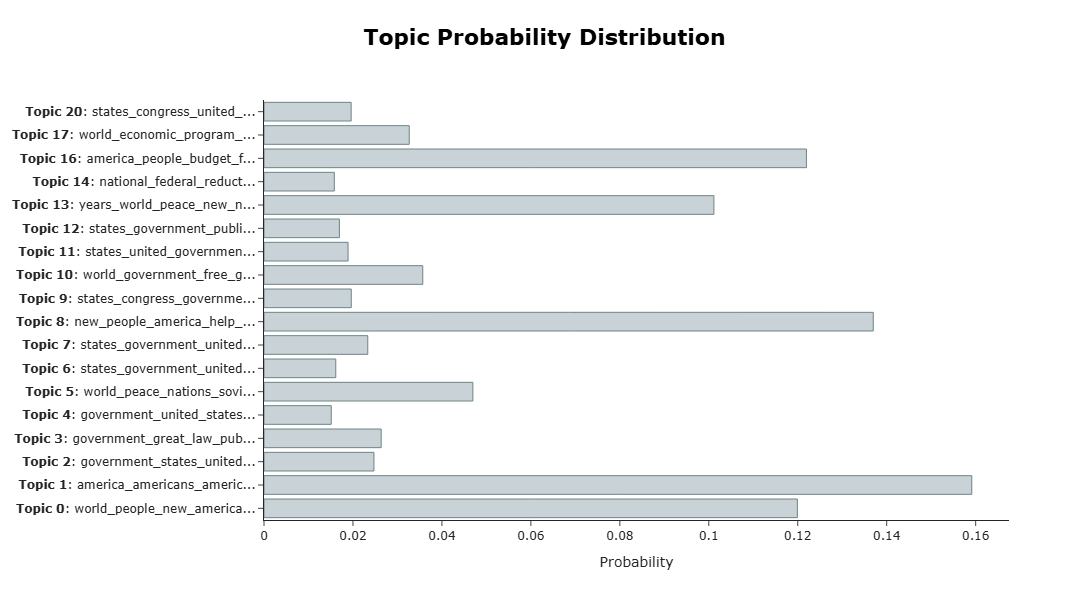

In [16]:
# Get distribution for the first speech
topic_distr, _ = BERT_topic_model.approximate_distribution(docs)

# Visualize
BERT_topic_model.visualize_distribution(topic_distr[0])

Naturally, the topic with the most weight here has mentions of the world in tandem with mentions of America

### Distribution of Topics across Presidential Elections

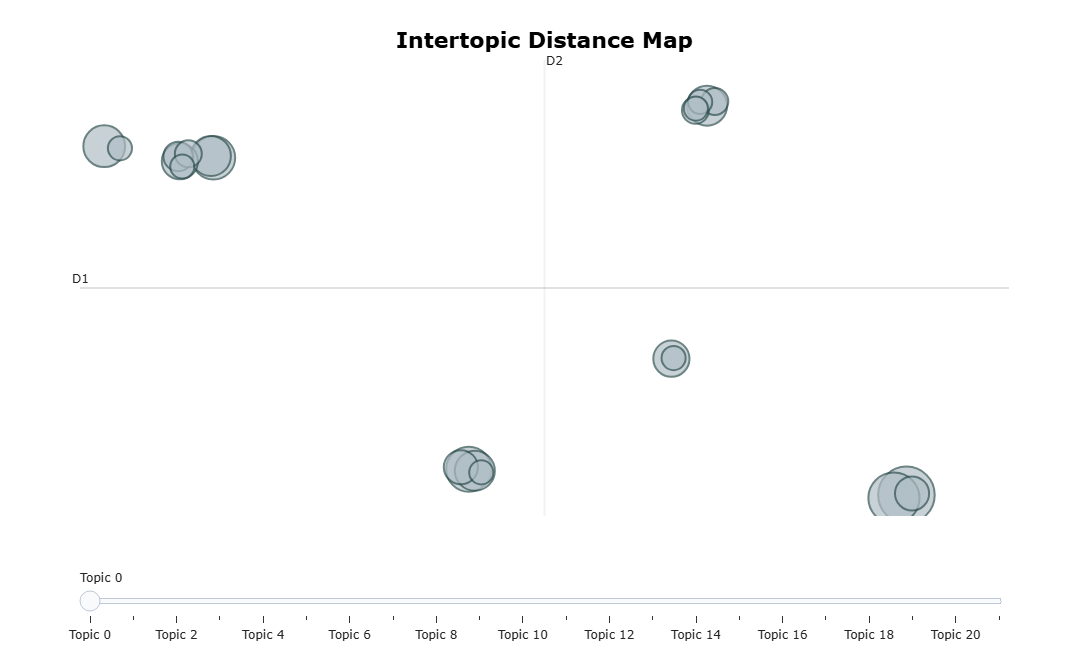

In [17]:
BERT_topic_model.visualize_topics()

This reflects what we saw earlier in the distribution of topics for the first speech. The most overwhelmingly dominant topic in presidential speeches is America.